In [40]:
from keras.preprocessing.image import ImageDataGenerator
import os

main_dir = '..\\dataset'

train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')
val_dir = os.path.join(main_dir, 'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(100, 100), batch_size=20, class_mode='categorical')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(100, 100), batch_size=20, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=(100, 100), batch_size=20, class_mode='categorical')

Found 1929 images belonging to 10 classes.
Found 548 images belonging to 10 classes.


In [41]:
for data_batch, label_batch in train_gen:
    print('Data batch shape:', data_batch.shape)
    print('Label batch shape:', label_batch.shape)
    break

Data batch shape: (20, 100, 100, 3)
Label batch shape: (20, 10)


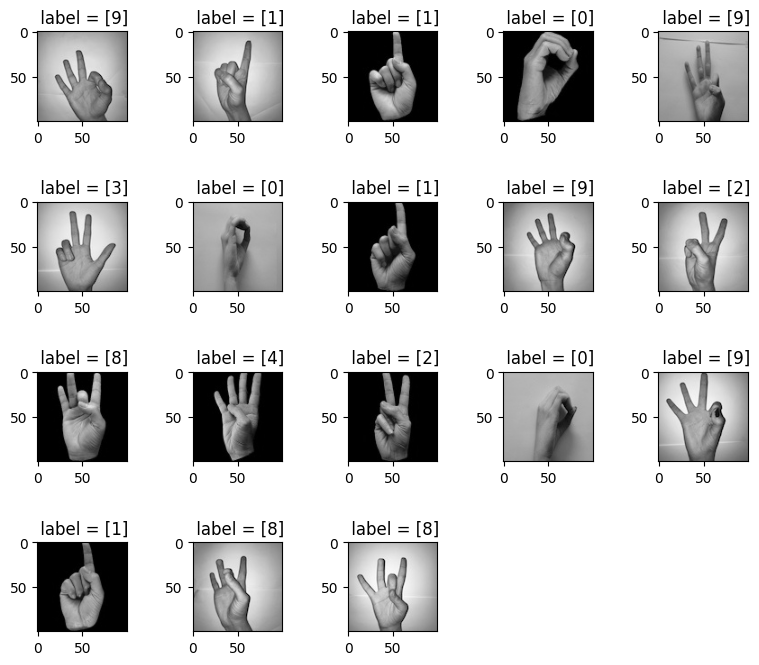

In [42]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, 19):
    img = data_batch[i]
    ax = fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=0.9, wspace=0.01)
    label = np.where(label_batch[i] == 1)
    ax.title.set_text(" label = " + str(label[0]))
    plt.imshow(img)
plt.show()

In [43]:
from keras import models, layers

network = models.Sequential()

network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 76832)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                768330    
                                                                 
Total params: 769,226
Trainable params: 769,226
Non-trainable params: 0
_________________________________________________________________


In [36]:
from keras import optimizers

network.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])

history = network.fit_generator(train_gen, steps_per_epoch=20, epochs=10,
                                validation_data=val_gen, validation_steps=10)

Epoch 1/10


C:\Users\storm\AppData\Local\Temp\ipykernel_29628\1755024938.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_gen, steps_per_epoch=20, epochs=10,


20/20 [==============================] - 2s 59ms/step - loss: 0.8366 - accuracy: 0.7850 - val_loss: 0.9968 - val_accuracy: 0.7000
Epoch 2/10
20/20 [==============================] - 1s 54ms/step - loss: 0.6963 - accuracy: 0.8350 - val_loss: 0.9212 - val_accuracy: 0.7300
Epoch 3/10
20/20 [==============================] - 1s 52ms/step - loss: 0.7601 - accuracy: 0.8201 - val_loss: 0.9544 - val_accuracy: 0.7150
Epoch 4/10
20/20 [==============================] - 1s 53ms/step - loss: 0.6846 - accuracy: 0.8425 - val_loss: 0.8936 - val_accuracy: 0.7050
Epoch 5/10
20/20 [==============================] - 1s 54ms/step - loss: 0.6937 - accuracy: 0.8275 - val_loss: 0.9312 - val_accuracy: 0.6900
Epoch 6/10
20/20 [==============================] - 1s 52ms/step - loss: 0.6952 - accuracy: 0.8329 - val_loss: 0.9077 - val_accuracy: 0.7150
Epoch 7/10
20/20 [==============================] - 1s 52ms/step - loss: 0.6884 - accuracy: 0.8425 - val_loss: 0.8280 - val_accuracy: 0.7800
Epoch 8/10
20/20 [======

In [50]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print('Train Accuracy:\n', train_accuracy)
print('\nValidation Accuracy:\n', val_accuracy)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
print('\nTrain Loss:\n', train_loss)
print('\nValidation Loss:\n', val_loss)

epochs = range(1,len(train_accuracy)+1)

Train Accuracy:
 [0.7850000262260437, 0.8349999785423279, 0.8200514316558838, 0.8424999713897705, 0.8274999856948853, 0.8329048752784729, 0.8424999713897705, 0.8575000166893005, 0.824999988079071, 0.8424999713897705]

Validation Accuracy:
 [0.699999988079071, 0.7300000190734863, 0.7149999737739563, 0.7049999833106995, 0.6899999976158142, 0.7149999737739563, 0.7799999713897705, 0.7749999761581421, 0.7649999856948853, 0.7950000166893005]

Train Loss:
 [0.8366315364837646, 0.6963209509849548, 0.7600740194320679, 0.6846470832824707, 0.6937102675437927, 0.6951737999916077, 0.6883882284164429, 0.6382357478141785, 0.6612300872802734, 0.6351345181465149]

Validation Loss:
 [0.9968402981758118, 0.9212132096290588, 0.9544117450714111, 0.8935611248016357, 0.9311885237693787, 0.9076588153839111, 0.8280263543128967, 0.8510093688964844, 0.7951986789703369, 0.7322965860366821]


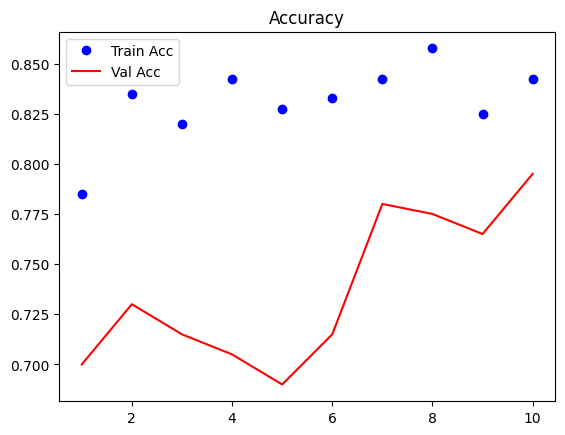

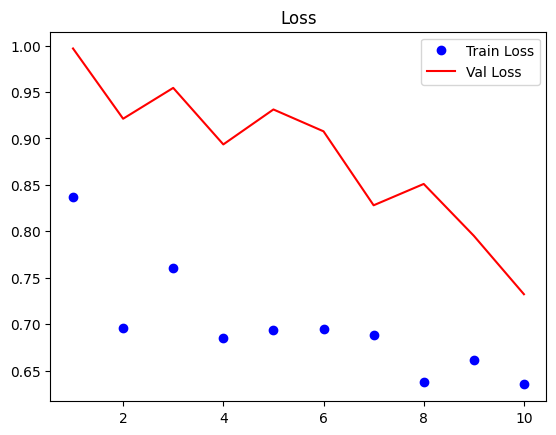

In [51]:
plt.plot(epochs, train_accuracy, 'bo', label='Train Acc')
plt.plot(epochs, val_accuracy, 'r', label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()